<h1><center>Machine Learning Challenge: Image Classification</center></h1>

Goutham Indiran Deekshit | u195004 <br>
Manav Mishra | u558101 <br>
Sadjia Safdari | u265740

**Load packages**

In [26]:
import numpy as np
import tensorflow
import time
get_ipython().run_line_magic('pylab', 'inline --no-import-all')
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

Populating the interactive namespace from numpy and matplotlib


## Task 1

In [27]:
with np.load("data/training-dataset.npz") as data:
        img = data["x"] # 97843200
        lbl = data["y"] # 124800

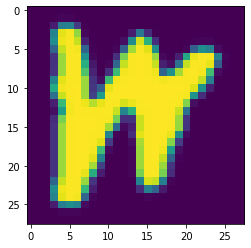

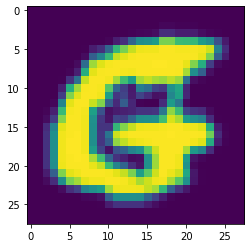

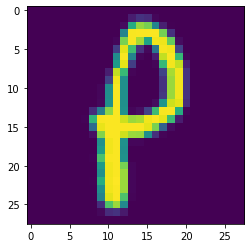

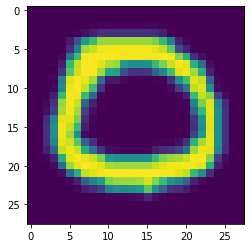

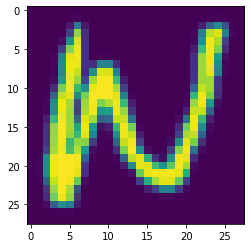

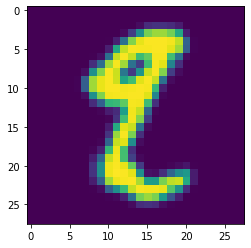

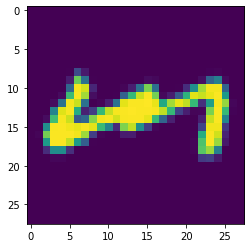

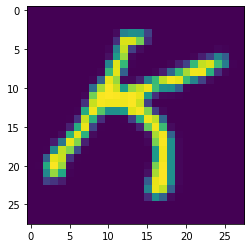

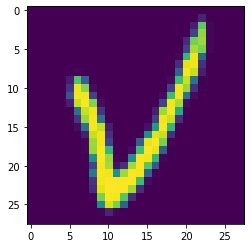

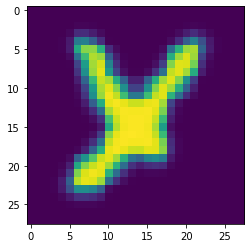

In [28]:
# dropping 1 position for prediction label
lbl = lbl - 1

for im in range(10):
    image = img[im]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

### 1.1 Neural Networks

**Splitting data**

In [29]:
# Splitting the train data again into validation and train data with 80% of the train data for training and the 
# remaining 10% for validation purpose

X_train, X_test, y_train, y_test = train_test_split(img, lbl, train_size=0.8, stratify=lbl ,random_state=1) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test, random_state=1) 

# Visualising the shape of the train and test data
print(X_train.shape) # 99840, 784
print(X_test.shape) # 12480, 784
print(X_val.shape) # 12480, 784
print(y_test.shape) # 12480,
print(y_val.shape) # 12480


(99840, 784)
(12480, 784)
(12480, 784)
(12480,)
(12480,)


**Preprocessing data**

In [30]:
# Preprocessing the data so that it runs faster during fitting the model
# Preprocess the data (these are NumPy arrays)
X_train = X_train.reshape(99840, 784).astype("float32") / 255
X_test = X_test.reshape(12480, 784).astype("float32") / 255
X_val = X_val.reshape(12480, 784).astype("float32") / 255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
y_val = y_val.astype("float32")

**Transform data**

In [31]:
# One hot decoding 
onehot = LabelBinarizer() # transform categorical target to dummies to train the NN
Y_train = onehot.fit_transform(y_train)
Y_val   = onehot.fit_transform(y_val)
Y_test   = onehot.transform(y_test)


**Baseline**

In [32]:
# baseline accuracy
baseline = LogisticRegression()
baseline.fit(X_train, y_train)
print(accuracy_score(y_test, baseline.predict(X_test))) # baseline = 0.72, ours should be higher

0.720272435897436


/Users/Sadjia/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Fitting the sequential model**

In [33]:
# Fitting the compiling and fitting the sequential model
#.....................................

model = Sequential() # initiates model
model.add(Dense(80, input_dim=X_train.shape[1], activation='relu')) # input layer
model.add(Dense(80, activation='relu')) # hidden layer
model.add(Dense(26, activation='softmax')) # We need to have as many units as classes, and softmax activation

# define parameters for training of the model    
optimizer = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy']) # for classification, the loss function should be categorical_crossentropy
model.fit(X_train, Y_train, epochs=60, batch_size=64, validation_data=(X_val, Y_val), verbose=1)

# loss: 0.2609, accuracy: 0.9162, val_loss: 0.3841, val_accuracy: 0.8871

Epoch 1/60
1560/1560 [==============================] - 4s 2ms/step - loss: 2.3086 - accuracy: 0.3762 - val_loss: 1.1550 - val_accuracy: 0.6721
Epoch 2/60
1560/1560 [==============================] - 4s 2ms/step - loss: 1.0994 - accuracy: 0.6868 - val_loss: 0.9602 - val_accuracy: 0.7254
Epoch 3/60
1560/1560 [==============================] - 4s 2ms/step - loss: 0.9319 - accuracy: 0.7337 - val_loss: 0.8545 - val_accuracy: 0.7563
Epoch 4/60
1560/1560 [==============================] - 4s 2ms/step - loss: 0.8389 - accuracy: 0.7606 - val_loss: 0.7746 - val_accuracy: 0.7786
Epoch 5/60
1560/1560 [==============================] - 4s 2ms/step - loss: 0.7546 - accuracy: 0.7844 - val_loss: 0.7164 - val_accuracy: 0.7940
Epoch 6/60
1560/1560 [==============================] - 4s 2ms/step - loss: 0.6871 - accuracy: 0.8019 - val_loss: 0.6739 - val_accuracy: 0.8103
Epoch 7/60
1560/1560 [==============================] - 4s 2ms/step - loss: 0.6426 - accuracy: 0.8142 - val_loss: 0.6312 - val_accuracy:

**Saving Model**

In [34]:
# Save the model to disk.
model.save_weights('model.h5')

# Load the model from disk later using:
model.load_weights('model.h5')

**Predictions**

In [36]:
# Predicting the classes on test set and printing the accuracy
y_pred = model.predict_classes(X_test, verbose=1)
print(accuracy_score(y_test, y_pred)) # 0.889

# Evaluating the model
model.evaluate(X_test,Y_test)

# Model summary
model.summary()
print((y_pred[:5]))
print((y_test[:5]))

390/390 [==============================] - 0s 1ms/step
0.8899839743589744
390/390 [==============================] - 1s 2ms/step - loss: 0.3553 - accuracy: 0.8900
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 80)                62800     
_________________________________________________________________
dense_7 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_8 (Dense)              (None, 26)                2106      
Total params: 71,386
Trainable params: 71,386
Non-trainable params: 0
_________________________________________________________________
[10  2 15  6  7]
[10.  2. 15.  6.  7.]


### 1.2 K-Nearest Neighbors

**Splitting data**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=1) #first split train 80, test 20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # from train 80, splitting 20 for validation


In [12]:
classifier = KNeighborsClassifier(n_neighbors=5) # try for different k value here, and when K= 5 yeilds better accuracy
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [13]:
t0 = time.time() 
y_pred = classifier.predict(X_val) #predicting on the validation set
t1 = time.time()
total = t1-t0 # to calculate the time taken for the classifier to predict
print(total)

3182.4518961906433


In [14]:
print(classification_report(y_val, y_pred)) # 0.85

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       933
           1       0.91      0.82      0.87       978
           2       0.82      0.96      0.89       944
           3       0.93      0.81      0.86       976
           4       0.90      0.88      0.89       976
           5       0.89      0.84      0.87       955
           6       0.82      0.67      0.74       971
           7       0.85      0.89      0.87       970
           8       0.62      0.69      0.65       936
           9       0.86      0.89      0.87       982
          10       0.95      0.83      0.89      1002
          11       0.59      0.74      0.65       957
          12       0.98      0.95      0.96       987
          13       0.85      0.92      0.88       927
          14       0.76      0.97      0.85       919
          15       0.86      0.92      0.89       992
          16       0.82      0.62      0.71       967
          17       0.85    

In [15]:
t0 = time.time()
y_pred = classifier.predict(X_test)
t1 = time.time()
total = t1-t0
print(total)

2837.9073343276978


In [16]:
print(classification_report(y_test, y_pred)) # 0.85

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       936
           1       0.93      0.83      0.87       956
           2       0.81      0.95      0.87       972
           3       0.93      0.80      0.86       962
           4       0.89      0.87      0.88       998
           5       0.87      0.81      0.84       936
           6       0.81      0.64      0.71       919
           7       0.86      0.90      0.88       974
           8       0.62      0.70      0.66       974
           9       0.86      0.87      0.87       985
          10       0.94      0.82      0.88       942
          11       0.58      0.73      0.65       955
          12       0.97      0.94      0.95       950
          13       0.83      0.91      0.87       947
          14       0.76      0.97      0.85       920
          15       0.83      0.87      0.85       931
          16       0.80      0.62      0.70       968
          17       0.83    

### **Task 2**

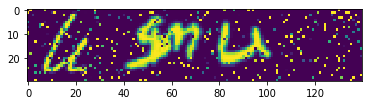

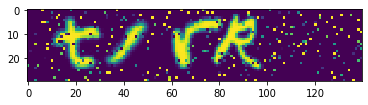

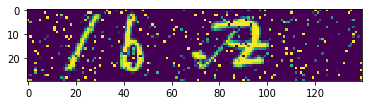

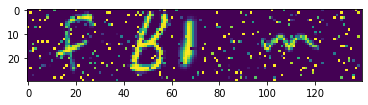

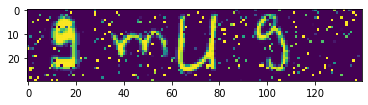

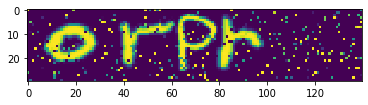

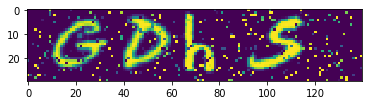

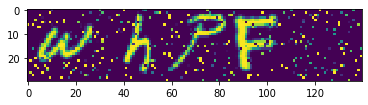

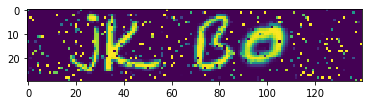

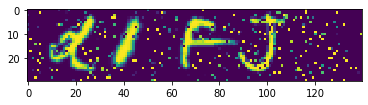

In [17]:
data = np.load("data/test-dataset.npy")

for im in range(10):
    img_test = data[im]
    img_test = np.array(img_test, dtype='float')
    pixels = img_test.reshape((30, 140))
    plt.imshow(pixels)
    plt.show()

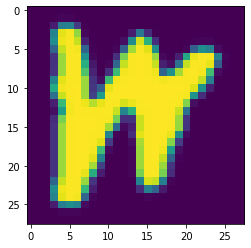

In [18]:
plt.imshow(img[0].reshape((28,28)))

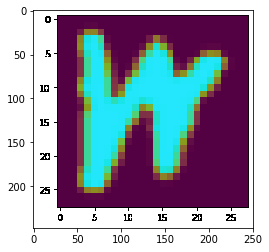

In [19]:
import cv2
I = cv2.imread("sample_dataset/w.png", 1)
plt.imshow(I)

In [20]:
import cv2
from skimage.util import random_noise

sp = random_noise(I, mode="s&p", seed=None, clip=True)
# salt = random_noise(I, mode="salt", seed=None, clip=True)
# pepper = random_noise(I, mode="pepper", seed=None, clip=True)

(<matplotlib.image.AxesImage at 0x7f8c6a705290>,
 Text(0.5, 1.0, 'Salt & Pepper'))

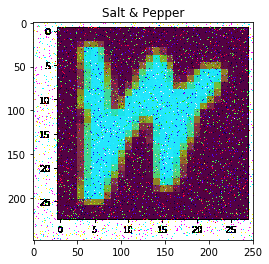

In [21]:
plt.imshow(sp), plt.title("Salt & Pepper")